# CIFAR-10 Photo Classification - Case Study - Tensorflow 2.0.0
---
Author: Bhaveshkumar Thaker

---

The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning.

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

*	0: airplane
*	1: automobile
*	2: bird
*	3: cat
*	4: deer
*	5: dog
*	6: frog
*	7: horse
*	8: ship
*	9: truck

These are very small images, much smaller than a typical photograph.

## Installing dependencies and notebook gpu setup

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 74kB/s 
     |████████████████████████████████| 3.8MB 29.3MB/s 
     |████████████████████████████████| 450kB 50.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


## Importing the libraries

In [0]:
import os, sys, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
print(tf.version.VERSION)
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

2.0.0
GPU is available


In [4]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('seaborn')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize': (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(list(colors.values()));

<Figure size 1008x792 with 0 Axes>

## Loading the Cifar10 dataset

In [5]:
cifar10_dataset = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10_dataset.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

170500096/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Inspecting train data

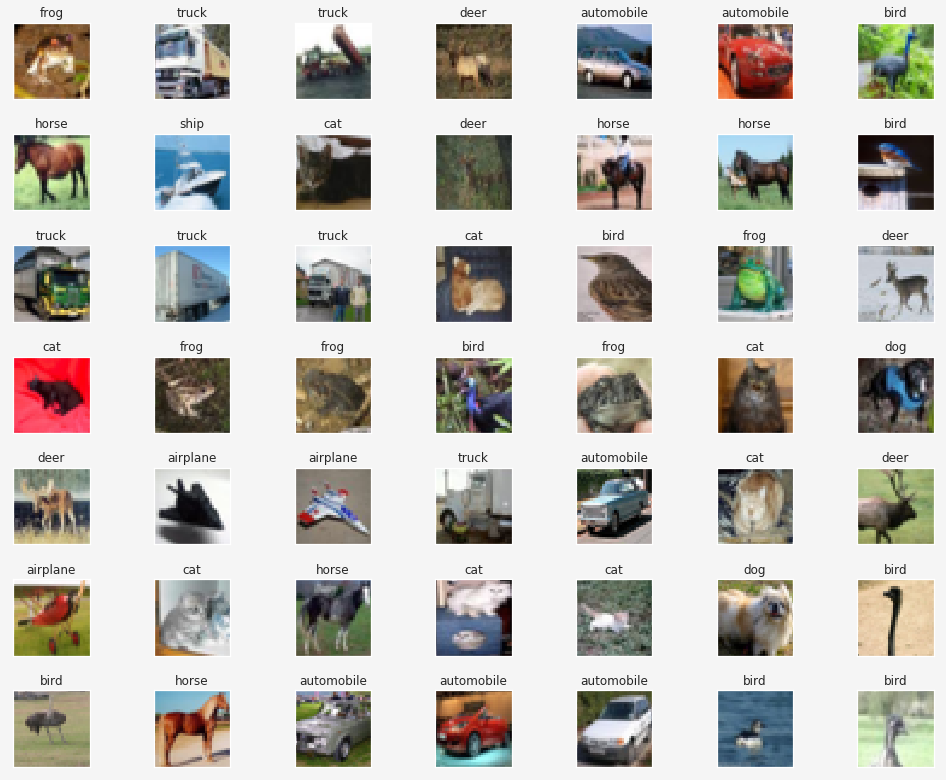

In [7]:
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## Inspecting test data

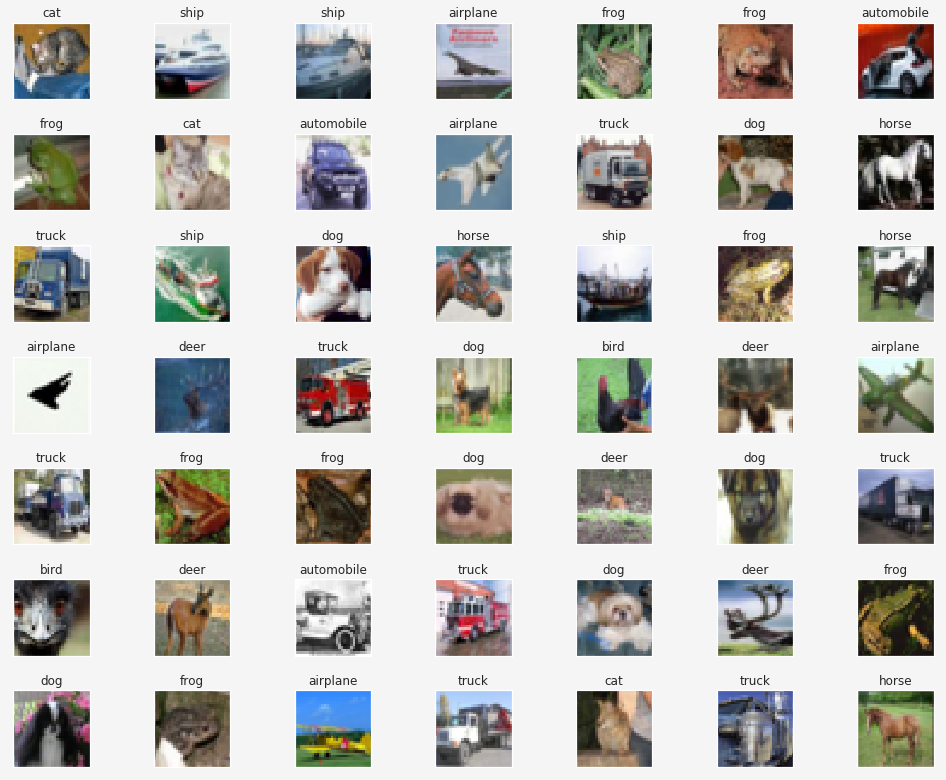

In [8]:
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(X_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing

### Image normalization

In [0]:
X_train = X_train.astype(np.float32)
X_train = X_train / 255.0

X_test = X_test.astype(np.float32)
X_test = X_test / 255.0

## Building a Convolutional Neural Network

### Defining the model

In [10]:
input_shape = (32, 32, 3)
filters = 64
kernel_size = (3, 3)
pool_size = (2, 2)
strides = 2
hidden_layer_size = 512
output_size = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=kernel_size, padding='same', activation=tf.nn.relu, input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kernel_size, padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(output_size, activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

### Compiling the model

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

### Training the model

In [12]:
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=2)

#early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3)
#history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping_callback], verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 26s - loss: 2.0053 - sparse_categorical_accuracy: 0.2239 - val_loss: 1.6182 - val_sparse_categorical_accuracy: 0.3777
Epoch 2/50
40000/40000 - 21s - loss: 1.5257 - sparse_categorical_accuracy: 0.4318 - val_loss: 1.3050 - val_sparse_categorical_accuracy: 0.5179
Epoch 3/50
40000/40000 - 21s - loss: 1.3561 - sparse_categorical_accuracy: 0.5063 - val_loss: 1.1996 - val_sparse_categorical_accuracy: 0.5673
Epoch 4/50
40000/40000 - 21s - loss: 1.2405 - sparse_categorical_accuracy: 0.5546 - val_loss: 1.1359 - val_sparse_categorical_accuracy: 0.5973
Epoch 5/50
40000/40000 - 21s - loss: 1.1516 - sparse_categorical_accuracy: 0.5896 - val_loss: 1.0273 - val_sparse_categorical_accuracy: 0.6348
Epoch 6/50
40000/40000 - 21s - loss: 1.0881 - sparse_categorical_accuracy: 0.6131 - val_loss: 1.0063 - val_sparse_categorical_accuracy: 0.6348
Epoch 7/50
40000/40000 - 21s - loss: 1.0362 - sparse_categorical_accuracy: 0.6319 - val_loss

### Plotting the model performance

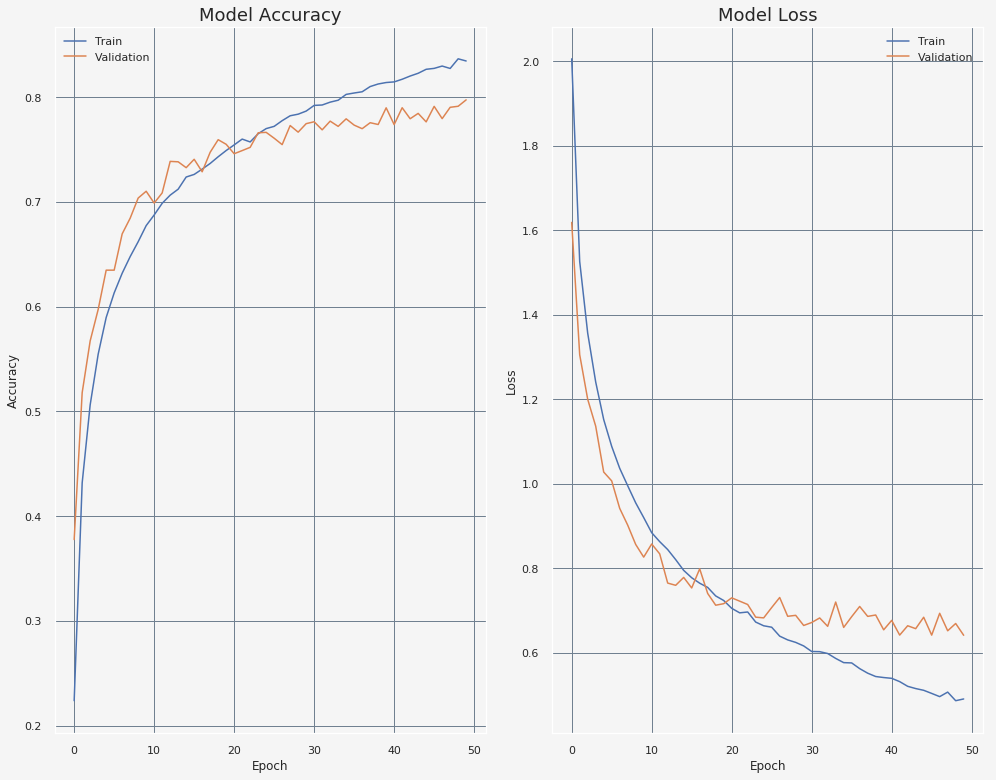

In [13]:
plt.subplot(1,2,1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy', fontsize=18)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=18)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

### Evaluating the model

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)

print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100.0))

10000/1 - 2s - loss: 0.7684 - sparse_categorical_accuracy: 0.7874

Test loss: 0.66. Test accuracy: 78.74%
